# Week 8 assignment: NLP on social media data

Take our social media we collected last week and:

- extract the sentiment scores of the titles of the posts
    - you can use the keyword method, Python packages, or other methods to extract the sentiment scores
- plot a histogram of the sentiment scores
- look at descriptive statistics (mean, median, standard deviation) of the sentiment scores
- examine the text for some of the highest and lowest sentiment scores
- write a short analysis of the results and our process, as well as propose one idea for something we could use this data for

Optional advanced challenges:
- Compare different sentiment analysis methods (e.g. textblob and VADER). Does one seem to work better than another?
- Get the sentiments of the comments for each post. We can do a lot with this, such as:
    - look at the average sentiment for each post and compare it with the sentiment of the title and/or text
    - look at the distribution of sentiments for each post and find the posts with the widest range of sentiments (controversial posts)
- Examine the subjectivity of our data (e.g. using textblob)
- Use topic modeling on the posts
    - you can also add in the comments to the topic model
- Look at the most frequent words for positive and negative sentiment posts

Note: There is no assignment solution file for this week.

# Load the data science data from last week 

In [3]:
import sqlite3
import pandas as pd

con = sqlite3.connect('ds_reddit.sqlite')
df = pd.read_sql_query('SELECT * from posts;', con)
con.close()
df

,title,link,author,n_comments,score,text
0,Weekly Entering & Transitioning - Thread 02 Oc...,/r/datascience/comments/16xmlky/weekly_enterin...,AutoModerator,117,9,\n\nWelcome to this week's entering & transit...
1,"Should we use non-linear models for ""linear"" d...",/r/datascience/comments/172gy7a/should_we_use_...,dopplegangery,77,132,So I had an argument with an interviewer who a...
2,How do data scientist managers manage data sci...,/r/datascience/comments/172zdgx/how_do_data_sc...,cazzobomba,1,3,As a data science manager how do you manage yo...
3,master degree vs bootcamp in datascience,/r/datascience/comments/173076d/master_degree_...,Fiajji_print,0,1,Which is better a mster degree or a bootcamp i...
4,Does your team use Agile and did you have trou...,/r/datascience/comments/172zrsu/does_your_team...,Champaign__Supernova,6,1,"I'm working with a team that uses Agile, and w..."
...,...,...,...,...,...,...
926,Data = Oil,/r/datascience/comments/ycgmbu/data_oil/,realbigflavor,79,1314,
927,Are there unions for data scientists?,/r/datascience/comments/tg2ki6/are_there_union...,DeepTrap,12,5,"I’m only a few years into my career, but I’ve ..."
928,Data Science and Data Analytics is becoming ul...,/r/datascience/comments/nue01q/data_science_an...,,189,1071,"I honestly, don't think people wanting to brea..."
929,Is anyone here into marketing analytics? How d...,/r/datascience/comments/gp0ctd/is_anyone_here_...,Kpopaddiction,48,138,Edit: Thanks to the person who gave this gold ...


# Sentiment scores - using sentiment keywords

In [4]:
sentiment_df = pd.read_csv('AFINN-en-165.txt', sep='\t', names=['word', 'score'], index_col='word')

In [5]:
sentiment_df

,score
word,
abandon,-2
abandoned,-2
abandons,-2
abducted,-2
abduction,-2
...,...
yucky,-2
yummy,3
zealot,-2


# Loading to sentiment dictionary alongwith score

In [6]:
sentiment_dict = sentiment_df.to_dict()['score']

In [7]:
sentiment_dict

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'aborted': -1,
 'aborts': -1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusing': -3,
 'abusive': -3,
 'accept': 1,
 'acceptable': 1,
 'acceptance': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accessible': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'acclaim': 2,
 'acclaimed': 2,
 'accolade': 2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accomplishment': 2,
 'accomplishments': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimo

In [8]:
# Copying the df to keep safe for further analysis
df_copy = df

In [9]:
df_copy

,title,link,author,n_comments,score,text
0,Weekly Entering & Transitioning - Thread 02 Oc...,/r/datascience/comments/16xmlky/weekly_enterin...,AutoModerator,117,9,\n\nWelcome to this week's entering & transit...
1,"Should we use non-linear models for ""linear"" d...",/r/datascience/comments/172gy7a/should_we_use_...,dopplegangery,77,132,So I had an argument with an interviewer who a...
2,How do data scientist managers manage data sci...,/r/datascience/comments/172zdgx/how_do_data_sc...,cazzobomba,1,3,As a data science manager how do you manage yo...
3,master degree vs bootcamp in datascience,/r/datascience/comments/173076d/master_degree_...,Fiajji_print,0,1,Which is better a mster degree or a bootcamp i...
4,Does your team use Agile and did you have trou...,/r/datascience/comments/172zrsu/does_your_team...,Champaign__Supernova,6,1,"I'm working with a team that uses Agile, and w..."
...,...,...,...,...,...,...
926,Data = Oil,/r/datascience/comments/ycgmbu/data_oil/,realbigflavor,79,1314,
927,Are there unions for data scientists?,/r/datascience/comments/tg2ki6/are_there_union...,DeepTrap,12,5,"I’m only a few years into my career, but I’ve ..."
928,Data Science and Data Analytics is becoming ul...,/r/datascience/comments/nue01q/data_science_an...,,189,1071,"I honestly, don't think people wanting to brea..."
929,Is anyone here into marketing analytics? How d...,/r/datascience/comments/gp0ctd/is_anyone_here_...,Kpopaddiction,48,138,Edit: Thanks to the person who gave this gold ...


# Sentiment score for each title in dataframe

In [10]:
import numpy as np

title_sentiments = []
for title in df['title']:
    words = title.lower().split()
    this_titles_sentiments = []
    for w in words:
        if w in sentiment_dict.keys():
            this_titles_sentiments.append(sentiment_dict[w])
        else:
            this_titles_sentiments.append(0)
            
    
    title_sentiments.append(np.mean(this_titles_sentiments))

In [11]:
df['keyword_sentiment'] = title_sentiments

In [12]:
df

,title,link,author,n_comments,score,text,keyword_sentiment
0,Weekly Entering & Transitioning - Thread 02 Oc...,/r/datascience/comments/16xmlky/weekly_enterin...,AutoModerator,117,9,\n\nWelcome to this week's entering & transit...,0.000000
1,"Should we use non-linear models for ""linear"" d...",/r/datascience/comments/172gy7a/should_we_use_...,dopplegangery,77,132,So I had an argument with an interviewer who a...,0.000000
2,How do data scientist managers manage data sci...,/r/datascience/comments/172zdgx/how_do_data_sc...,cazzobomba,1,3,As a data science manager how do you manage yo...,0.000000
3,master degree vs bootcamp in datascience,/r/datascience/comments/173076d/master_degree_...,Fiajji_print,0,1,Which is better a mster degree or a bootcamp i...,0.000000
4,Does your team use Agile and did you have trou...,/r/datascience/comments/172zrsu/does_your_team...,Champaign__Supernova,6,1,"I'm working with a team that uses Agile, and w...",-0.105263
...,...,...,...,...,...,...,...
926,Data = Oil,/r/datascience/comments/ycgmbu/data_oil/,realbigflavor,79,1314,,0.000000
927,Are there unions for data scientists?,/r/datascience/comments/tg2ki6/are_there_union...,DeepTrap,12,5,"I’m only a few years into my career, but I’ve ...",0.000000
928,Data Science and Data Analytics is becoming ul...,/r/datascience/comments/nue01q/data_science_an...,,189,1071,"I honestly, don't think people wanting to brea...",0.000000
929,Is anyone here into marketing analytics? How d...,/r/datascience/comments/gp0ctd/is_anyone_here_...,Kpopaddiction,48,138,Edit: Thanks to the person who gave this gold ...,0.000000


Got the sentiment score for each title based on the keywords used. The column is "keyword_sentiments"

# Histogram of sentiment score

<Axes: ylabel='Frequency'>

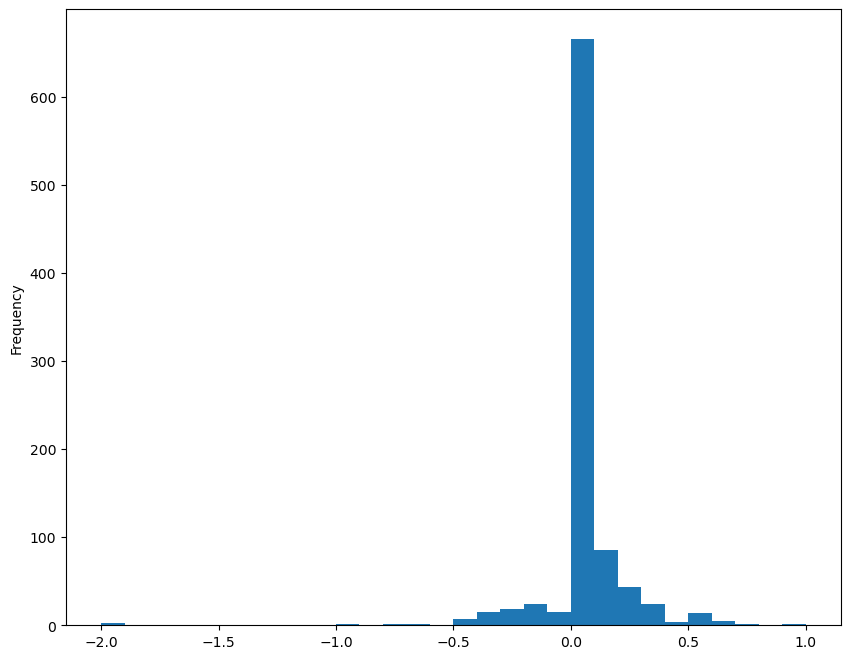

In [233]:
df['keyword_sentiment'].plot.hist(bins=30)

# Descriptive statistics on sentiment score

In [234]:
# mean
df['keyword_sentiment'].mean()

0.026069457694041374

In [235]:
# Median
df['keyword_sentiment'].median()

0.0

In [236]:
# Standard deviation
df['keyword_sentiment'].std()

0.19837626542791315

# Top and bottom sentiment posts

In [237]:
df.sort_values(by='keyword_sentiment')[['title', 'keyword_sentiment']]

,title,keyword_sentiment
117,Confused,-2.000000
422,Catastrophic Forgetting,-2.000000
61,Hiring hell,-2.000000
759,dbt-Jinja Cheat Sheet,-1.000000
172,Really shitty coding skills,-0.750000
...,...,...
647,Help finding datasets,0.666667
873,Recommended learning?? 📚,0.666667
781,Batch Inference Best Practices?,0.750000
432,Code best practices,1.000000


In [238]:
# full titles of the bottom 10 sentiments
df.sort_values(by='keyword_sentiment')['title'].to_list()[:10]

['Confused',
 'Catastrophic Forgetting',
 'Hiring hell',
 'dbt-Jinja Cheat Sheet',
 'Really shitty coding skills',
 'What pissed you off last week?',
 'My hands hurt',
 'Poor statistical/Linear Algebra foundation',
 'Cybersecurity Breach Data Set',
 'Tesla trying to screw desperate people']

In [239]:
# full titles of the top 10 sentiments
df.sort_values(by='keyword_sentiment', ascending=False)['title'].to_list()[:10]

['Hello help',
 'Code best practices',
 'Batch Inference Best Practices?',
 'Recommended learning?? 📚',
 'Help finding datasets',
 'Robust Reinforcement Learning',
 'Need help networking!',
 'Best cloud solution for ML on huge dataset',
 'BEST GPU FOR IA 100/200$?',
 'Best Way to Learn SAS']

# Other methods for sentiment analysis - textblob

In [2]:
# Installing the textblob and vader sentiment package
!conda install -c conda-forge textblob vadersentiment -y

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): conda.anaconda.org:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): conda.anaconda.org:443
\ DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/osx-arm64/current_repodata.json HTTP/1.1" 304 0
/ DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/noarch/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/osx-arm64/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://conda.anaconda.org:443 "GET /conda-forge/osx-arm64/current_repodata.json HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/

In [13]:
from textblob import TextBlob

In [14]:
def get_tb_sentiment(text):
    tb = TextBlob(text)
    return tb.sentiment[0]

df['tb_sentiment'] = df['title'].apply(get_tb_sentiment)

In [15]:
df

,title,link,author,n_comments,score,text,keyword_sentiment,tb_sentiment
0,Weekly Entering & Transitioning - Thread 02 Oc...,/r/datascience/comments/16xmlky/weekly_enterin...,AutoModerator,117,9,\n\nWelcome to this week's entering & transit...,0.000000,0.000000
1,"Should we use non-linear models for ""linear"" d...",/r/datascience/comments/172gy7a/should_we_use_...,dopplegangery,77,132,So I had an argument with an interviewer who a...,0.000000,0.000000
2,How do data scientist managers manage data sci...,/r/datascience/comments/172zdgx/how_do_data_sc...,cazzobomba,1,3,As a data science manager how do you manage yo...,0.000000,0.000000
3,master degree vs bootcamp in datascience,/r/datascience/comments/173076d/master_degree_...,Fiajji_print,0,1,Which is better a mster degree or a bootcamp i...,0.000000,0.000000
4,Does your team use Agile and did you have trou...,/r/datascience/comments/172zrsu/does_your_team...,Champaign__Supernova,6,1,"I'm working with a team that uses Agile, and w...",-0.105263,0.150000
...,...,...,...,...,...,...,...,...
926,Data = Oil,/r/datascience/comments/ycgmbu/data_oil/,realbigflavor,79,1314,,0.000000,0.000000
927,Are there unions for data scientists?,/r/datascience/comments/tg2ki6/are_there_union...,DeepTrap,12,5,"I’m only a few years into my career, but I’ve ...",0.000000,0.000000
928,Data Science and Data Analytics is becoming ul...,/r/datascience/comments/nue01q/data_science_an...,,189,1071,"I honestly, don't think people wanting to brea...",0.000000,0.325000
929,Is anyone here into marketing analytics? How d...,/r/datascience/comments/gp0ctd/is_anyone_here_...,Kpopaddiction,48,138,Edit: Thanks to the person who gave this gold ...,0.000000,0.000000


# Histogram for textblob sentiment score

<Axes: ylabel='Frequency'>

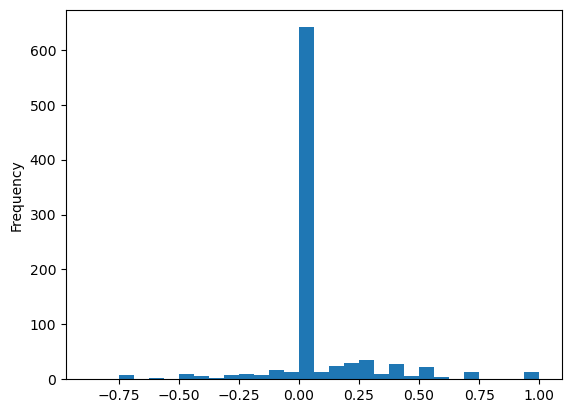

In [16]:
df['tb_sentiment'].plot.hist(bins=30)

In [22]:
# mean
df['tb_sentiment'].mean()

0.05698027342629921

In [23]:
# median
df['tb_sentiment'].median()

0.0

In [24]:
# standard Deviation
df['tb_sentiment'].std()

0.22844526548550123

# VADER method
Using NLTK vader sentiment analyzer

In [17]:
import nltk
    
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/puneet/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [18]:
review = df['title']
review = str(review).encode('utf-8')

In [19]:
df['score_vader']=df['title'].apply(lambda review: analyzer.polarity_scores(str(review)))

In [20]:
df

,title,link,author,n_comments,score,text,keyword_sentiment,tb_sentiment,score_vader
0,Weekly Entering & Transitioning - Thread 02 Oc...,/r/datascience/comments/16xmlky/weekly_enterin...,AutoModerator,117,9,\n\nWelcome to this week's entering & transit...,0.000000,0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,"Should we use non-linear models for ""linear"" d...",/r/datascience/comments/172gy7a/should_we_use_...,dopplegangery,77,132,So I had an argument with an interviewer who a...,0.000000,0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,How do data scientist managers manage data sci...,/r/datascience/comments/172zdgx/how_do_data_sc...,cazzobomba,1,3,As a data science manager how do you manage yo...,0.000000,0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,master degree vs bootcamp in datascience,/r/datascience/comments/173076d/master_degree_...,Fiajji_print,0,1,Which is better a mster degree or a bootcamp i...,0.000000,0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,Does your team use Agile and did you have trou...,/r/datascience/comments/172zrsu/does_your_team...,Champaign__Supernova,6,1,"I'm working with a team that uses Agile, and w...",-0.105263,0.150000,"{'neg': 0.13, 'neu': 0.87, 'pos': 0.0, 'compou..."
...,...,...,...,...,...,...,...,...,...
926,Data = Oil,/r/datascience/comments/ycgmbu/data_oil/,realbigflavor,79,1314,,0.000000,0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
927,Are there unions for data scientists?,/r/datascience/comments/tg2ki6/are_there_union...,DeepTrap,12,5,"I’m only a few years into my career, but I’ve ...",0.000000,0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
928,Data Science and Data Analytics is becoming ul...,/r/datascience/comments/nue01q/data_science_an...,,189,1071,"I honestly, don't think people wanting to brea...",0.000000,0.325000,"{'neg': 0.0, 'neu': 0.794, 'pos': 0.206, 'comp..."
929,Is anyone here into marketing analytics? How d...,/r/datascience/comments/gp0ctd/is_anyone_here_...,Kpopaddiction,48,138,Edit: Thanks to the person who gave this gold ...,0.000000,0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [21]:
df['compound']=df['score_vader'].apply(lambda score_dict:score_dict['compound'])

In [22]:
df

,title,link,author,n_comments,score,text,keyword_sentiment,tb_sentiment,score_vader,compound
0,Weekly Entering & Transitioning - Thread 02 Oc...,/r/datascience/comments/16xmlky/weekly_enterin...,AutoModerator,117,9,\n\nWelcome to this week's entering & transit...,0.000000,0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
1,"Should we use non-linear models for ""linear"" d...",/r/datascience/comments/172gy7a/should_we_use_...,dopplegangery,77,132,So I had an argument with an interviewer who a...,0.000000,0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2,How do data scientist managers manage data sci...,/r/datascience/comments/172zdgx/how_do_data_sc...,cazzobomba,1,3,As a data science manager how do you manage yo...,0.000000,0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
3,master degree vs bootcamp in datascience,/r/datascience/comments/173076d/master_degree_...,Fiajji_print,0,1,Which is better a mster degree or a bootcamp i...,0.000000,0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
4,Does your team use Agile and did you have trou...,/r/datascience/comments/172zrsu/does_your_team...,Champaign__Supernova,6,1,"I'm working with a team that uses Agile, and w...",-0.105263,0.150000,"{'neg': 0.13, 'neu': 0.87, 'pos': 0.0, 'compou...",-0.4019
...,...,...,...,...,...,...,...,...,...,...
926,Data = Oil,/r/datascience/comments/ycgmbu/data_oil/,realbigflavor,79,1314,,0.000000,0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
927,Are there unions for data scientists?,/r/datascience/comments/tg2ki6/are_there_union...,DeepTrap,12,5,"I’m only a few years into my career, but I’ve ...",0.000000,0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
928,Data Science and Data Analytics is becoming ul...,/r/datascience/comments/nue01q/data_science_an...,,189,1071,"I honestly, don't think people wanting to brea...",0.000000,0.325000,"{'neg': 0.0, 'neu': 0.794, 'pos': 0.206, 'comp...",0.6369
929,Is anyone here into marketing analytics? How d...,/r/datascience/comments/gp0ctd/is_anyone_here_...,Kpopaddiction,48,138,Edit: Thanks to the person who gave this gold ...,0.000000,0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000


# Summary

First we downloaded the data saved in last week's assignment for data science subreddit. Then calculated the sentiment score based on keyword analysis for each title. Plotted a histogram for sentiment score and frequency.Further calculated the mean, median and standard deviation of the sentiments and the mean or average score is 0.026. Sorted the sentiments column to find out the top and bottom posts with keyword sentiment method. finally listed out the titles with top score for sentiments and 10 titles which are at the bottom of the sentiment score.

Also explored other sentiment analysis methods like textblob and VADER sentiment analysis. First installed the packages and did the necessary imports. Calculated the sentiment for each title using textBlob class polarity that gives values from -1 to +1. Plotted the histogram for tb sentiment score and frequency. The mean for this is 0.05.

Further explored the VADER sentiment method which gives us breakdown like negative, positive and neutral. ALso calculated the VADER sentiment score "compound" for each title.

Comparison of all the methods and more analysis is done in the optional section.

# Optional section

# Comparison of various sentiment analysis methods 

In [23]:
# Taking mean of compound 

df['compound'].mean()

0.07808485499462943

The results looks to be best with VADER sentiment analysis as compared to keyword sentiments and textbob method. Textblob method also gives better result as it checks with more number of sentiment words.

# Getting the post and comments df for sentiment analysis

In [24]:
import praw
import pandas as pd

import credentials

In [25]:
reddit = praw.Reddit(client_id=credentials.client_id,
                     client_secret=credentials.client_secret,
                     user_agent=credentials.user_agent)

In [65]:
reddit_posts_data = {'title': [],
                    'link': [],
                    'author': [],
                    'n_comments': [],
                    'score': [],
                    'text': [],
                    'id': []}

reddit_comments_data = {'author': [],
                        'score': [],
                        'text': [],
                        'post_id': []}

ds_subreddit = reddit.subreddit('datascience').new(limit=None)

for post in list(ds_subreddit):
    reddit_posts_data['title'].append(post.title)
    reddit_posts_data['link'].append(post.permalink)
    if post.author is None:
        reddit_posts_data['author'].append(None)
    else:
        reddit_posts_data['author'].append(post.author.name)
    reddit_posts_data['n_comments'].append(post.num_comments)
    reddit_posts_data['score'].append(post.score)
    reddit_posts_data['text'].append(post.selftext)
    reddit_posts_data['id'].append(post.id)

    post.comments.replace_more(limit=None)
    for comment in post.comments:
        if comment.author is None:
            reddit_comments_data['author'].append('')
        else:
            reddit_comments_data['author'].append(comment.author.name)
        reddit_comments_data['score'].append(comment.score)
        reddit_comments_data['text'].append(comment.body)
        reddit_comments_data['post_id'].append(post.id)

In [66]:
post_df = pd.DataFrame(reddit_posts_data)
comment_df = pd.DataFrame(reddit_comments_data)

In [67]:
comment_df

,author,score,text,post_id
0,Mescallan,11,"Without being too grim, I suspect prostitute o...",175w0gv
1,fakeuser515357,4,"There's nothing special about programming, AI ...",175w0gv
2,gBoostedMachinations,1,Umm… not even close. DS will be among the firs...,175w0gv
3,CSCAnalytics,1,These posts are getting out of hand. \n\nWhat’...,175w0gv
4,Shnibu,2,https://shap.readthedocs.io/en/latest/,175qvkx
...,...,...,...,...
5844,milkteaoppa,1,Change your Masters Research into Experience a...,16dwt7v
5845,Davidat0r,1,How is this a dichotomy?,16dwt7v
5846,Dangerous_Hearing_34,2,Atta-boy!,16dwi3w
5847,billsgates12,2,Thanks for sharing! :),16dwi3w


In [68]:
post_df

,title,link,author,n_comments,score,text,id
0,SHAP Deep Reinforcement Learning,/r/datascience/comments/175x92z/shap_deep_rein...,ProductOk7316,0,1,"Hi Guys,\n\nIs there a way to integrate SHAP w...",175x92z
1,Do you believe AI Programmer/Data Scientist wi...,/r/datascience/comments/175w0gv/do_you_believe...,DJAlaskaAndrew,5,0,I once had this crazy professor who told every...,175w0gv
2,Predicting what features lead to long wait times,/r/datascience/comments/175qvkx/predicting_wha...,Bulky_Gap_7072,5,2,I have a mathematical education and programmin...,175qvkx
3,Is fitting functions to data (with chi2 and al...,/r/datascience/comments/175qent/is_fitting_fun...,Silly_Valley,41,0,&#x200B;,175qent
4,Security measures at my workplace,/r/datascience/comments/175q00o/security_measu...,EncryptedMyst,3,0,I work for a pretty big Aerospace manufacturin...,175q00o
...,...,...,...,...,...,...,...
891,What are some of the things your non-technical...,/r/datascience/comments/16dxavy/what_are_some_...,Mundane-Astronomer-7,74,136,Creating a post for us to vent and share some ...,16dxavy
892,Has being a data scientist/analyst helped you ...,/r/datascience/comments/16dx7ej/has_being_a_da...,haunted_tomato,16,9,I have heard from software engineers/developer...,16dx7ej
893,I coded my first Python library! A chess analy...,/r/datascience/comments/16dwydn/i_coded_my_fir...,PlentyGood67126,5,13,I've been plugging away for the past few weeks...,16dwydn
894,should I continue applying for jobs or invest ...,/r/datascience/comments/16dwt7v/should_i_conti...,Glad-Description2525,25,30,I received invaluable feedback from this Reddi...,16dwt7v


# Using textblob method to get the sentiment score for text column.

In [69]:
df['tb_text_sentiment'] = df['text'].apply(get_tb_sentiment)

In [70]:
df

,title,link,author,n_comments,score,text,keyword_sentiment,tb_sentiment,score_vader,compound,tb_text_sentiment
0,Weekly Entering & Transitioning - Thread 02 Oc...,/r/datascience/comments/16xmlky/weekly_enterin...,AutoModerator,117,9,\n\nWelcome to this week's entering & transit...,0.000000,0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.210000
1,"Should we use non-linear models for ""linear"" d...",/r/datascience/comments/172gy7a/should_we_use_...,dopplegangery,77,132,So I had an argument with an interviewer who a...,0.000000,0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.058333
2,How do data scientist managers manage data sci...,/r/datascience/comments/172zdgx/how_do_data_sc...,cazzobomba,1,3,As a data science manager how do you manage yo...,0.000000,0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.103175
3,master degree vs bootcamp in datascience,/r/datascience/comments/173076d/master_degree_...,Fiajji_print,0,1,Which is better a mster degree or a bootcamp i...,0.000000,0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.500000
4,Does your team use Agile and did you have trou...,/r/datascience/comments/172zrsu/does_your_team...,Champaign__Supernova,6,1,"I'm working with a team that uses Agile, and w...",-0.105263,0.150000,"{'neg': 0.13, 'neu': 0.87, 'pos': 0.0, 'compou...",-0.4019,0.161837
...,...,...,...,...,...,...,...,...,...,...,...
926,Data = Oil,/r/datascience/comments/ycgmbu/data_oil/,realbigflavor,79,1314,,0.000000,0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000000
927,Are there unions for data scientists?,/r/datascience/comments/tg2ki6/are_there_union...,DeepTrap,12,5,"I’m only a few years into my career, but I’ve ...",0.000000,0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.029167
928,Data Science and Data Analytics is becoming ul...,/r/datascience/comments/nue01q/data_science_an...,,189,1071,"I honestly, don't think people wanting to brea...",0.000000,0.325000,"{'neg': 0.0, 'neu': 0.794, 'pos': 0.206, 'comp...",0.6369,0.176596
929,Is anyone here into marketing analytics? How d...,/r/datascience/comments/gp0ctd/is_anyone_here_...,Kpopaddiction,48,138,Edit: Thanks to the person who gave this gold ...,0.000000,0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.220000


In [71]:
# mean (average) for text column
df['tb_text_sentiment'].mean()

0.11140227726774192

# Sentiment analysis using textblob on comment_df 

In [73]:
comment_df['tb_comment_sentiment'] = comment_df['text'].apply(get_tb_sentiment)

In [74]:
comment_df

,author,score,text,post_id,tb_comment_sentiment
0,Mescallan,11,"Without being too grim, I suspect prostitute o...",175w0gv,-0.100000
1,fakeuser515357,4,"There's nothing special about programming, AI ...",175w0gv,0.211905
2,gBoostedMachinations,1,Umm… not even close. DS will be among the firs...,175w0gv,0.125000
3,CSCAnalytics,1,These posts are getting out of hand. \n\nWhat’...,175w0gv,0.073046
4,Shnibu,2,https://shap.readthedocs.io/en/latest/,175qvkx,0.000000
...,...,...,...,...,...
5844,milkteaoppa,1,Change your Masters Research into Experience a...,16dwt7v,0.350000
5845,Davidat0r,1,How is this a dichotomy?,16dwt7v,0.000000
5846,Dangerous_Hearing_34,2,Atta-boy!,16dwi3w,0.000000
5847,billsgates12,2,Thanks for sharing! :),16dwi3w,0.375000


In [79]:
comment_df[comment_df['post_id'] == '175w0gv']['tb_comment_sentiment'].mean()

0.07748758594346829

# Average sentiment analysis for each post

Taking mean of sentiment score for all the comments in particular post.

In [87]:
# Taking the list of post_id's in comment df
gk = comment_df.groupby('post_id')

In [91]:
gk['post_id'].first()

post_id
16dwi3w    16dwi3w
16dwt7v    16dwt7v
16dwydn    16dwydn
16dx7ej    16dx7ej
16dxavy    16dxavy
            ...   
175nfei    175nfei
175q00o    175q00o
175qent    175qent
175qvkx    175qvkx
175w0gv    175w0gv
Name: post_id, Length: 678, dtype: object

In [112]:
post_sentiment_data = {'post_id': [],
                    'sentiment_avg': []}

for post in gk['post_id'].first():
    post_sentiment_data['post_id'].append(post)
    post_sentiment_data['sentiment_avg'].append(comment_df[comment_df['post_id'] == post]['tb_comment_sentiment'].mean())

In [113]:
post_sentiment_df = pd.DataFrame(post_sentiment_data)

In [114]:
post_sentiment_df

,post_id,sentiment_avg
0,16dwi3w,0.125000
1,16dwt7v,0.157460
2,16dwydn,0.237500
3,16dx7ej,0.067142
4,16dxavy,0.077178
...,...,...
673,175nfei,-0.250000
674,175q00o,0.308333
675,175qent,0.135714
676,175qvkx,0.114815


# top and bottom score for each post

In [116]:
post_sentiment_df.sort_values(by='sentiment_avg')[['post_id', 'sentiment_avg']]

,post_id,sentiment_avg
331,16ojk5h,-0.750000
367,16pfsg2,-0.390000
134,16i8gor,-0.350000
458,16suvck,-0.260952
7,16e5hb6,-0.250000
...,...,...
383,16q09qa,0.650000
318,16o47eq,0.700000
141,16ik5gn,0.800000
333,16omeof,0.800000


# Histogram plot for sentiment score of posts

<Axes: ylabel='Frequency'>

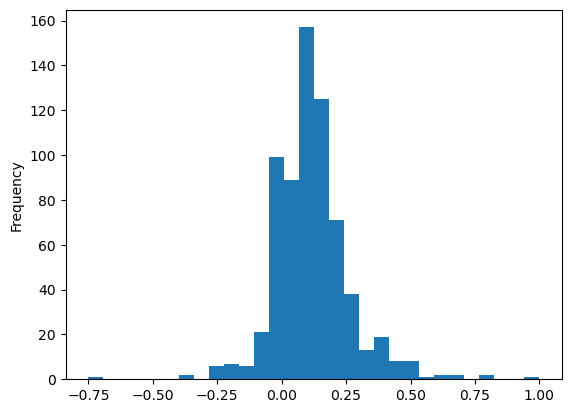

In [117]:
post_sentiment_df['sentiment_avg'].plot.hist(bins=30)

# Subjectivity and Polarity of title - textblob

Using the earlier saved df_copy. subjectivity has the value from 0 to 1.

In [142]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    tb = TextBlob(text)
    return tb.sentiment.subjectivity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
df_copy['Subjectivity'] = df_copy['title'].apply(getSubjectivity)

#Now display data
df_copy.head()

,title,link,author,n_comments,score,text,Subjectivity
0,Weekly Entering & Transitioning - Thread 02 Oc...,/r/datascience/comments/16xmlky/weekly_enterin...,AutoModerator,117,9,\n\nWelcome to this week's entering & transit...,0.000
1,"Should we use non-linear models for ""linear"" d...",/r/datascience/comments/172gy7a/should_we_use_...,dopplegangery,77,132,So I had an argument with an interviewer who a...,0.000
2,How do data scientist managers manage data sci...,/r/datascience/comments/172zdgx/how_do_data_sc...,cazzobomba,1,3,As a data science manager how do you manage yo...,0.000
3,master degree vs bootcamp in datascience,/r/datascience/comments/173076d/master_degree_...,Fiajji_print,0,1,Which is better a mster degree or a bootcamp i...,0.000
4,Does your team use Agile and did you have trou...,/r/datascience/comments/172zrsu/does_your_team...,Champaign__Supernova,6,1,"I'm working with a team that uses Agile, and w...",0.475


In [144]:
#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

df_copy['Polarity'] = df_copy['title'].apply(getPolarity)

df_copy.head()

,title,link,author,n_comments,score,text,Subjectivity,Polarity
0,Weekly Entering & Transitioning - Thread 02 Oc...,/r/datascience/comments/16xmlky/weekly_enterin...,AutoModerator,117,9,\n\nWelcome to this week's entering & transit...,0.000,0.00
1,"Should we use non-linear models for ""linear"" d...",/r/datascience/comments/172gy7a/should_we_use_...,dopplegangery,77,132,So I had an argument with an interviewer who a...,0.000,0.00
2,How do data scientist managers manage data sci...,/r/datascience/comments/172zdgx/how_do_data_sc...,cazzobomba,1,3,As a data science manager how do you manage yo...,0.000,0.00
3,master degree vs bootcamp in datascience,/r/datascience/comments/173076d/master_degree_...,Fiajji_print,0,1,Which is better a mster degree or a bootcamp i...,0.000,0.00
4,Does your team use Agile and did you have trou...,/r/datascience/comments/172zrsu/does_your_team...,Champaign__Supernova,6,1,"I'm working with a team that uses Agile, and w...",0.475,0.15


# group Polarity

In [151]:
# Group the range of Polarity into different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

df_copy['Insight'] = df_copy['Polarity'].apply(getInsight)
df_copy.head(50)

,title,link,author,n_comments,score,text,Subjectivity,Polarity,Insight
0,Weekly Entering & Transitioning - Thread 02 Oc...,/r/datascience/comments/16xmlky/weekly_enterin...,AutoModerator,117,9,\n\nWelcome to this week's entering & transit...,0.000000,0.000000,Neutral
1,"Should we use non-linear models for ""linear"" d...",/r/datascience/comments/172gy7a/should_we_use_...,dopplegangery,77,132,So I had an argument with an interviewer who a...,0.000000,0.000000,Neutral
2,How do data scientist managers manage data sci...,/r/datascience/comments/172zdgx/how_do_data_sc...,cazzobomba,1,3,As a data science manager how do you manage yo...,0.000000,0.000000,Neutral
3,master degree vs bootcamp in datascience,/r/datascience/comments/173076d/master_degree_...,Fiajji_print,0,1,Which is better a mster degree or a bootcamp i...,0.000000,0.000000,Neutral
4,Does your team use Agile and did you have trou...,/r/datascience/comments/172zrsu/does_your_team...,Champaign__Supernova,6,1,"I'm working with a team that uses Agile, and w...",0.475000,0.150000,Positive
5,Why are there no good graph visualisation prog...,/r/datascience/comments/17212yf/why_are_there_...,HStuart18,36,70,Does anyone know of any half decent graph/netw...,0.600000,-0.350000,Negative
6,I need help deciding model use,/r/datascience/comments/172sjxp/i_need_help_de...,Miserable_Ease_8330,1,1,I’m currently working on my capstone project. ...,0.000000,0.000000,Neutral
7,"a controversial request, but please help me ou...",/r/datascience/comments/172subu/a_controversia...,shostakophiles,17,0,bit more context— me and my groupmates are con...,0.950000,0.550000,Positive
8,How do I make use of other parameters' forecas...,/r/datascience/comments/1726i2h/how_do_i_make_...,Skilinger,14,6,"Topic might be a bit confusing, let me elabora...",0.375000,-0.125000,Negative
9,Data Cleaning & Wrangling Standards?,/r/datascience/comments/172ko0y/data_cleaning_...,jrdubbleu,1,0,Are there any industry standard frameworks for...,0.000000,0.000000,Neutral


# Visualization - Insight graph

Importing the seaborn

In [155]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

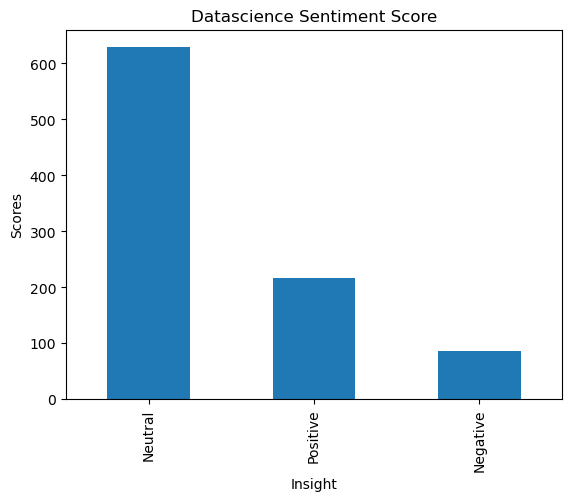

In [156]:
#Plot the values count of sentiment
plt.title("Datascience Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
df_copy['Insight'].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

# Topic modelling

# Most frequent words for positive and negative sentiment posts - word cloud

Preparing a word cloud using the wordcloud package to get a visual representation of most common words. It is key to understanding the data and ensuring we are on the right track, and if any more preprocessing is necessary before training the model.

In [217]:
stopwords = STOPWORDS
print(stopwords)

{'only', 'again', 'just', 'about', 'because', "haven't", "they've", 'by', 'www', "don't", 'like', 'but', 'who', 'would', 'how', 'at', 'http', "shan't", 'an', 'in', 'otherwise', 'yourself', 'however', 'is', 'are', 'they', 'my', "why's", 'between', 'during', 'been', 'have', 'this', 'further', 'other', "hadn't", 'yourselves', 'their', 'why', "i've", 'more', 'else', "she'd", 'these', 'here', "doesn't", 'me', 'get', 'had', "when's", 'nor', 'her', 'she', 'we', 'while', 'against', 'should', 'could', 'since', 'him', "i'll", 'hence', 'under', 'any', "it's", 'with', 'shall', 'no', 'on', 'so', 'whom', "you're", "she'll", 'therefore', 'than', 'to', "he'd", 'when', 'some', 'which', 'most', 'ought', 'has', "we're", 'does', "isn't", "that's", 'all', 'his', "wouldn't", 'did', 'i', 'am', 'ever', "there's", 'not', 'cannot', "shouldn't", 'too', 'very', 'do', 'having', 'its', 'himself', "we'll", 'into', 'down', 'the', 'then', 'above', 'as', 'out', 'before', 'herself', 'being', 'each', "she's", 'can', 'unt

/Users/puneet/anaconda3/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


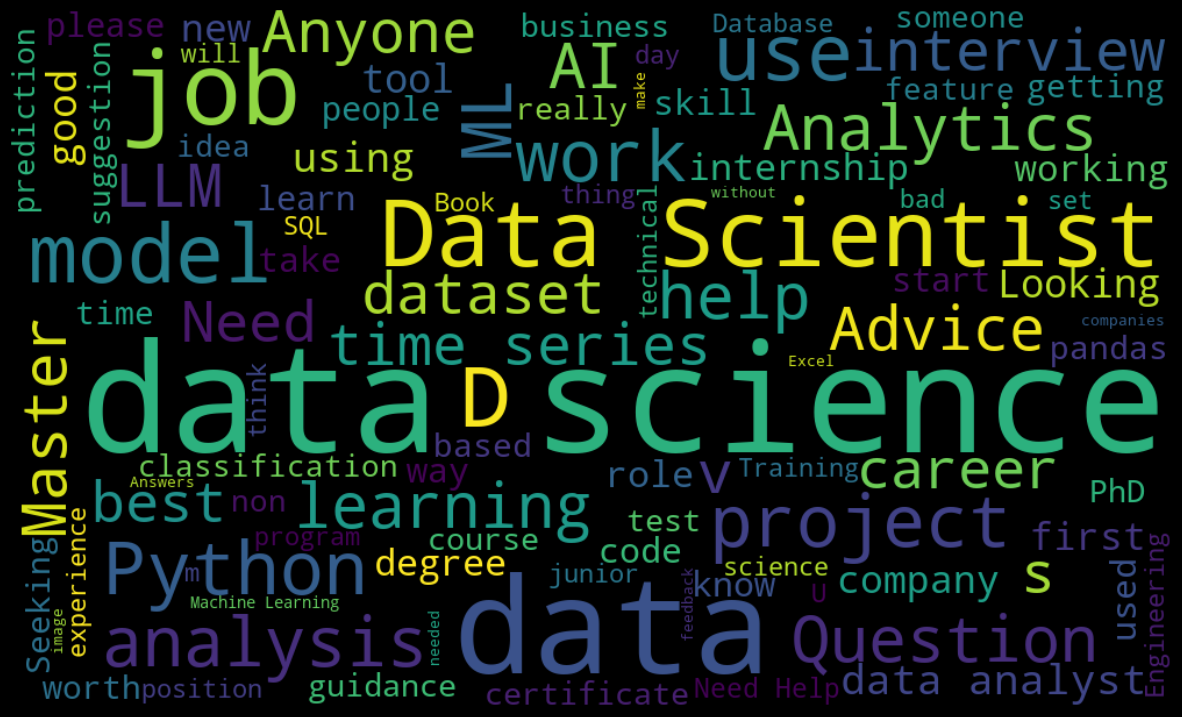

In [218]:
text = ' '.join( [twts for twts in df_copy['title']] ) #To join all tweet
 # generate word cloud 
wordcloud = WordCloud(width=1000, height = 600, 
 max_words = 100,
 stopwords = stopwords,
 background_color="black").generate(text)

# Display the generated image:
plt.figure( figsize=(15,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

In [163]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [185]:
# Keeping only the text columns and first 100 records
df_tm = df_copy.sample(100)
df_tm

,title,link,author,n_comments,score,text,Subjectivity,Polarity,Insight
420,Public health data source help,/r/datascience/comments/16o2hp2/public_health_...,TelevisionOk6718,2,4,Does anybody know of any states in the United ...,0.066667,0.000000,Neutral
710,Rule-based vs Black-Box,/r/datascience/comments/16hynfg/rulebased_vs_b...,nickshoh,12,1,"Hey guys, I am a junior engineer currently wor...",0.000000,0.000000,Neutral
345,Creating own query language,/r/datascience/comments/16pnmno/creating_own_q...,themanifestingtree,10,1,"Hi, I am trying to create a query language for...",1.000000,0.600000,Positive
567,Are LLMs going to replace other types of AI/ML...,/r/datascience/comments/16l3p6h/are_llms_going...,JTcyto,20,3,I work as a Data Scientist in an academic lean...,0.375000,-0.125000,Negative
344,Is running an open sourced LLM in the cloud vi...,/r/datascience/comments/16p6c0h/is_running_an_...,--leockl--,6,11,"Assuming using the same cloud service, Is runn...",0.366667,-0.016667,Negative
...,...,...,...,...,...,...,...,...,...
581,Are data science portfolios worthwhile?,/r/datascience/comments/16kijfa/are_data_scien...,daufoi21,1,5,Do you guys keep a data science portfolio even...,0.500000,0.500000,Positive
392,Making the most of an internship.,/r/datascience/comments/16ol31u/making_the_mos...,Electrical-Milk6899,2,3,I'll be starting a Data Science internship whe...,0.500000,0.500000,Positive
706,Hi guys! Can you tell me some ethical dilemmas...,/r/datascience/comments/16i8gor/hi_guys_can_yo...,gabojim03,4,0,,0.600000,0.200000,Positive
827,Anyone remember a recent story about not doing...,/r/datascience/comments/16eq09c/anyone_remembe...,oilshell,4,12,"I remember there was a recent ""viral"" post fro...",0.250000,0.000000,Neutral


In [186]:
df_tm = df_tm.drop(columns=['n_comments', 'score', 'Subjectivity','Polarity','Insight'], axis=1)
df_tm

,title,link,author,text
420,Public health data source help,/r/datascience/comments/16o2hp2/public_health_...,TelevisionOk6718,Does anybody know of any states in the United ...
710,Rule-based vs Black-Box,/r/datascience/comments/16hynfg/rulebased_vs_b...,nickshoh,"Hey guys, I am a junior engineer currently wor..."
345,Creating own query language,/r/datascience/comments/16pnmno/creating_own_q...,themanifestingtree,"Hi, I am trying to create a query language for..."
567,Are LLMs going to replace other types of AI/ML...,/r/datascience/comments/16l3p6h/are_llms_going...,JTcyto,I work as a Data Scientist in an academic lean...
344,Is running an open sourced LLM in the cloud vi...,/r/datascience/comments/16p6c0h/is_running_an_...,--leockl--,"Assuming using the same cloud service, Is runn..."
...,...,...,...,...
581,Are data science portfolios worthwhile?,/r/datascience/comments/16kijfa/are_data_scien...,daufoi21,Do you guys keep a data science portfolio even...
392,Making the most of an internship.,/r/datascience/comments/16ol31u/making_the_mos...,Electrical-Milk6899,I'll be starting a Data Science internship whe...
706,Hi guys! Can you tell me some ethical dilemmas...,/r/datascience/comments/16i8gor/hi_guys_can_yo...,gabojim03,
827,Anyone remember a recent story about not doing...,/r/datascience/comments/16eq09c/anyone_remembe...,oilshell,"I remember there was a recent ""viral"" post fro..."


In [187]:
# Load the regular expression library
import re
# Remove punctuation
df_tm['text_processed'] = \
df_tm['text'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the text to lowercase
df_tm['text_processed'] = \
df_tm['text_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
df_tm['text_processed'].head()

420    does anybody know of any states in the united ...
710    hey guys i am a junior engineer currently work...
345    hi i am trying to create a query language for ...
567    i work as a data scientist in an academic lean...
344    assuming using the same cloud service is runni...
Name: text_processed, dtype: object

# LDA modelling - preparing data 

Transforming the textual data in a format that will serve as an input for training LDA model. Started by tokenizing the text and removing stopwords.

In [208]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = df_tm.text_processed.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:10])

['anybody', 'know', 'states', 'united', 'states', 'public', 'data', 'sources', 'track', 'overdose']


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/puneet/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Converting the tokenized object into a corpus and dictionary.

In [209]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:10])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 2), (9, 1)]


# Training the LDA model
Building a model with 10 topics where each topic is a combination of keywords, and each keyword contributes a certain weightage to the topic.

In [210]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.014*"data" + 0.008*"like" + 0.005*"work" + 0.004*"ml" + 0.004*"scientist" '
  '+ 0.004*"science" + 0.004*"would" + 0.004*"project" + 0.004*"time" + '
  '0.003*"model"'),
 (1,
  '0.012*"data" + 0.006*"documents" + 0.005*"work" + 0.005*"project" + '
  '0.005*"course" + 0.004*"list" + 0.004*"thanks" + 0.004*"model" + '
  '0.004*"like" + 0.004*"would"'),
 (2,
  '0.013*"data" + 0.007*"model" + 0.007*"one" + 0.006*"project" + '
  '0.006*"would" + 0.006*"time" + 0.006*"know" + 0.005*"work" + '
  '0.004*"running" + 0.004*"llama"'),
 (3,
  '0.022*"data" + 0.007*"company" + 0.007*"get" + 0.006*"would" + 0.006*"work" '
  '+ 0.006*"time" + 0.005*"like" + 0.005*"one" + 0.005*"https" + '
  '0.005*"experience"'),
 (4,
  '0.018*"data" + 0.007*"like" + 0.006*"would" + 0.006*"time" + '
  '0.006*"science" + 0.005*"think" + 0.005*"need" + 0.004*"ai" + 0.004*"one" + '
  '0.004*"help"'),
 (5,
  '0.022*"data" + 0.006*"would" + 0.005*"scientist" + 0.005*"work" + '
  '0.005*"know" + 0.005*"job" + 0.0

# LDA model visualization - results
Trying to  visualize the topics for interpretability. Using a gensim visualization package, pyLDAvis which is designed to help interactively with:
    Better understanding and interpreting individual topics, and
    Better understanding the relationships between the topics.
We get an option to manually select each topic to view its top most frequent and/or “relevant” terms, using different values of the λ parameter. This can help when you’re trying to assign a human interpretable name or “meaning” to each topic.

Exploring the Intertopic Distance Plot can help learn about how topics relate to each other, including potential higher-level structure between groups of topics.

In [212]:
# Installing the pyLDAvis package
pip install pyLDAvis

Note: you may need to restart the kernel to use updated packages.


In [211]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = ('/Users/puneet/Documents/MSDS_VaishaliWork/MSDS600_DataScience/Week8/resultsldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.018583 -0.029108       1        1  22.933650
3     -0.051640 -0.015997       2        1  19.445162
9     -0.037754 -0.008473       3        1  14.073928
2     -0.032951  0.044103       4        1  11.214034
6      0.038823 -0.020667       5        1   9.538242
8      0.016667  0.059008       6        1   7.418026
4      0.007999 -0.014496       7        1   5.433820
0      0.010714 -0.005856       8        1   4.350061
7      0.044732 -0.002150       9        1   3.202052
1      0.021992 -0.006363      10        1   2.391025, topic_info=           Term        Freq       Total Category  logprob  loglift
1          data  136.000000  136.000000  Default  30.0000  30.0000
57         like   39.000000   39.000000  Default  29.0000  29.0000
918         ssl    7.000000    7.000000  Default  28.0000  28.0000
279     science   36.000000   36.000000  Default  27.0000  27.0000
2575  documents    4.000000    4.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
429       https    0.549057   28.020676  Topic10  -5.7713  -0.1990
59         need    0.519112   20.424536  Topic10  -5.8274   0.0611
2          know    0.542141   33.505028  Topic10  -5.7840  -0.3905
279     science    0.503123   36.319644  Topic10  -5.8586  -0.5458
314        team    0.434984   17.466790  Topic10  -6.0042   0.0407

[687 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
179       1  0.117261   able
179       2  0.234522   able
179       3  0.234522   able
179       4  0.117261   able
179       5  0.117261   able
...     ...       ...    ...
483       3  0.118350  years
483       4  0.059175  years
483       5  0.059175  years
483       7  0.059175  years
483       8  0.059175  years

[1084 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 4, 10, 3, 7, 9, 5, 1, 8, 2])

This topic model gives us the 30 most relevant terms for a particular topic on the scale λ = 1. Have done the visualization for 10 topics in this model.
Intertopic Distance Map depicts how the topics are related to each other. The graph shows topic 2 and 3 have some relevance to each other and also topic 7 and 8.
From the result we observe that the model can be further trained to have more technical terms and we can skip generic words like "know", "get","also" etc.

# Summay - optional section 

The VADER sentiment analysis seems to be the bext model for this data as it gives the average of 0.078. Then used the data to get the post and comment dataframe for analysis. Used textblob method to get the sentiment score for text columns in post_df.Also applied textblob method to get the sentiment analysis for comments df.
Worked on getting the sentiment score for each post using text blob method. Took the mean of sentiment score for all the comments in each post to get the sentiment score for the posts. The result is saved in post_sentiment_df data frame. Also listed out the top and bottom posts based on sentiment score. Further plotted the histogram for sentiment average and frequency.
Worked on subjectivity and polarity of sentiments using text blob method. Used the saved data frame df_copy for this analysis. Got the subjectivity of each title using the function with textBlob class. Also calculated the polarity for each title. Further checked on the group polarity. The function is defined to get the values as Negative (for score <0), Neutral (for score =0) and Positive (for score >0) and saved the result in “Insight” column.
Visualised the Insight plot and observation is that maximum titles have neutral score followed by positive in terms of sentiments.

Topic Modelling - Wordcloud and LDA model :-
Explored the Topic modelling on this data. First checked the word cloud for all the titles to get the most used words that make sense (after removing the stopwords). Most words are fine and technical terms as per the topic.
Then explored the Genesis package for LDA modelling. Took a sample of around 100 records to work on. Dropped all the extra columns and have taken the text columns for modelling. Cleaning the text column of data by removing all the stop words, punctuations and converting the text to small case. Then converted the same text to dictionary and corpus. Trained the model further for 10 topics to get the most related words for the topic and also how these are related with each other.

Installed pyLDAvis package to visualise the result of this LDA model. Got the graph that gives most related words for each topic and the Intertopic distance map that gives the understanding how much each topic is related to another. ALso attached the html file generated using pyLDAvis package.